Student exercise: Create your own CRN, then write down the ODE that comes from that CRN, then simulate it using odeint and also using BioCRNpyler  (some examples will be provided for the general audience).


**Create your own CRN**
Let's just look at something simple, like 
<br> <br>
$$\text{2 ATP + Glucose} \leftrightarrow^{E1} \text{2 ADP + F16P}$$<br>
$$\text{2 ADP + F16P} \leftrightarrow^{E2} \text{2 ATP + Isobutanol}$$<br>
$$\text{3 ADP + Pi + F16P} \leftrightarrow^{E3} \text{3 ATP + Isobutanol}$$<br>
$$\text{ATP} \rightarrow^{E4} \text{ADP + Pi}$$ <br> <br>

**ODE:**<br>


Student Exercise: Compare the explicit enzymatic reaction model with models that make QSS assumption? (Hint: Recreate plots shown in Del Vecchio, Murray, Chapter 4 on model reduction).


In [7]:
import bokeh.plotting
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

## Exercise 1
Simulate <br>
$A + B \rightarrow^{k1} 2B$ <br>
$B \rightarrow^{k2} A$

$\frac{dA}{dt} = -k_1 A B + k_2 B$<br> <br>
$\frac{dB}{dt} = -k_2 B + k_1 A B$

In [34]:
import numpy as nps
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from biocrnpyler.chemical_reaction_network import Species, Reaction, ChemicalReactionNetwork

### ODEINT

In [31]:
k1 = 1.0
k2 = 1.0

# A = [a,b]
def dA_dt(A, t=0):
    # unpack A
    a,b = A
    
    # Return ODEs
    da_dt = -k1 * a * b + k2 * b
    db_dt = -k2 * b + k1 * a * b
    #db_dt = -da_dt
    
    return np.array([da_dt, db_dt])

In [32]:
timepoints = np.linspace(0, 1, 1000)  
A0 = np.array([10, 5]) # initials conditions: x[0] = 10 and y[0] = 5
A, infodict = odeint(dA_dt, A0, timepoints, full_output = True)
infodict['message']

'Integration successful.'

Text(0, 0.5, 'population')

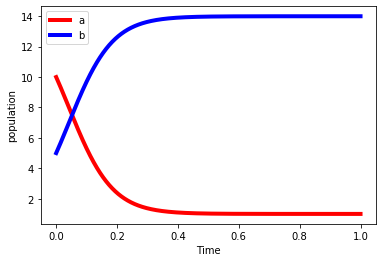

In [33]:
a, b = A.T
plt.figure()
plt.plot(timepoints, a, 'r-', lw = 4, label='a')
plt.plot(timepoints, b  , 'b-', lw = 4, label='b')
plt.legend(loc = "best")
plt.xlabel('Time')
plt.ylabel('population')
#plt.title('Evolution of populations');

### biocrnpyler<br>
$A + B \rightarrow^{k1} 2B$ <br>
$B \rightarrow^{k2} A$<br><br>
$\frac{dA}{dt} = -k_1 A B + k_2 B$<br> <br>
$\frac{dB}{dt} = -k_2 B + k_1 A B$

In [49]:
k1 = 1.0
k2 = 1.0

A = Species(name = "A")
B = Species(name = "B")

CRN = ChemicalReactionNetwork(species = [A,B], 
                              reactions = [Reaction([A, B], [B, B], k = k1, k_rev= k1),
                                           Reaction([B], [A], k = k2 )])

#k = kf, k_rev = kr

In [50]:
print("\n CRN Model:\n", CRN)


 CRN Model:
 Species = A, B
Reactions = [
	A + B <--> 2 B        massaction: k_f(A,B)=1.0*A*B k_r(B)=1.0*B^2
	B --> A        massaction: k_f(B)=1.0*B
]


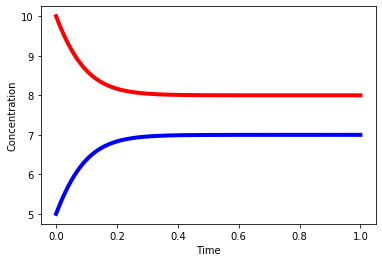

In [51]:
#Species, reactions, and CRNs can all be directly printed

timepoints = np.linspace(0, 1, 1000)
A_0 = {'A':10, "B":5}

plt.figure()
R = CRN.simulate_with_bioscrape(timepoints = timepoints, initial_condition_dict = A_0)

# plt.plot(timepoints, , color = 'black', lw = 4)
# plt.plot(timepoints, , color = 'black', lw = 4)

plt.plot(timepoints, R["A"], 'r-', lw = 4, label='a')
plt.plot(timepoints, R["B"]  , 'b-', lw = 4, label='b')


# plt.title('Concentration Trajectory Dynamics')
plt.xlabel("Time")
plt.ylabel("Concentration");
plt.show()

**Exercise 2**

$E + S \leftrightarrow^{k_{+}}_{k_{-}} C \rightarrow^{k_{cat}} E + P$

$\frac{dC}{dt} = k_+(E_{tot} - C)S + k_- C - k_{cat}C \approx 0$<br><br>
$\frac{dS}{dt} = -k_+ (E_{tot} - C)S + k_- C $<br><br>
$\frac{dP}{dt} = k_{cat} C$ <br><br>
Recall that: $C = E_{tot} \frac{s/K}{1+s/K} = E_{tot} \frac{s}{K + S}$<br><br>
Note that: $\frac{s}{K + S}$ is a positive hill function.

**Use Hill Function / Michaelis Menten**

**Use Mass Action**

## Exercise 1 
 (Beginner) For the enzymatic reaction system compare the results for the reduced and the full model and find the parameter regime in which the reduced model works. Solution available in Chapter 3 of [1].

In [52]:
from biocrnpyler.chemical_reaction_network import Species, Reaction, ChemicalReactionNetwork

In [80]:
# Parameters
a = 1.0
d = 0.5
k_cat = 0.1

# Species
E = Species(name = "E", material_type = 'enzyme')
S = Species(name = "S", material_type = 'substrate')
C = Species(name = "C", material_type = 'complex')
P = Species(name = "P", material_type = 'product')

species = [E, S, C, P]

# Reactions
rxn1 = Reaction([E, S], [C], k = a, k_rev = d, propensity_type = 'massaction') # try splitting into two rxn
# rxn1 = Reaction([E, S], [C], k = a, propensity_type = 'massaction') # try splitting into two rxn
# rxn2 = Reaction([C], [E,S], k = d, propensity_type = 'massaction')
rxn_cat = Reaction([C], [E, P], k = k_cat, propensity_type = 'massaction')

reactions = [rxn1, rxn2, rxn_cat]

# Simulate the CRN
CRN1 = ChemicalReactionNetwork(species = species, reactions = reactions)
print('Full massaction model for enzymatic reaction system:\n',CRN1)

Full massaction model for enzymatic reaction system:
 Species = enzyme_E, substrate_S, complex_C, product_P
Reactions = [
	enzyme_E + substrate_S <--> complex_C        massaction: k_f(enzyme_E,substrate_S)=1.0*enzyme_E*substrate_S k_r(complex_C)=0.5*complex_C
	complex_C --> enzyme_E + substrate_S        massaction: k_f(complex_C)=0.5*complex_C
	complex_C --> enzyme_E + product_P        massaction: k_f(complex_C)=0.1*complex_C
]


In [81]:
timepoints = np.linspace(0, 100, 1000)
x_0 = {'enzyme_E':10, 'substrate_S':10, 'complex_C': 0, 'product_P':0}

R1 = CRN1.simulate_with_bioscrape(timepoints = timepoints, initial_condition_dict = x_0)

In [82]:
# R1

In [84]:
p = bokeh.plotting.figure(width = 550, height = 450, title = 'Full Model with massaction')
p.line(timepoints, R1['enzyme_E'], legend_label = 'E', color = 'blue')
p.line(timepoints, R1['complex_C'], legend_label = 'C', color = 'pink')
p.line(timepoints, R1['substrate_S'], legend_label = 'S', color = 'green')
p.line(timepoints, R1['product_P'], legend_label = 'P', color = 'red')

bokeh.io.show(p)

**Reduced Model with Positive Hill Function**

In [92]:
# Parameters
K_X = 10.0
K_S = 1.0

# Species
E = Species(name = "E", material_type = 'enzyme')
S = Species(name = "S", material_type = 'substrate')
C = Species(name = "C", material_type = 'complex')
P = Species(name = "P", material_type = 'product')

species_red = [E, S, C, P]

# Reactions
rxn1_red = Reaction([E, S], [C], k = K_X, propensity_type = 'hillpositive',
                   propensity_params = {"s1":str(S), "K":K_S, "n":2}) # try splitting into two rxn

rxn_cat_red = Reaction([C], [E, P], k = K_X, propensity_type = 'hillpositive',
                  propensity_params = {"s1":str(S), "K":K_S, "n":2})
# rxn1_red = Reaction([], [P], k = K_X, propensity_type = 'hillpositive',
                         # propensity_params = {"s1":str(S), "K":K_S, "n":2})


reactions_red = [rxn1_red, rxn_cat_red]

# Simulate the CRN
CRN_red = ChemicalReactionNetwork(species = species_red, reactions = reactions_red)
print('Full massaction model for enzymatic reaction system:\n',CRN_red)

Full massaction model for enzymatic reaction system:
 Species = enzyme_E, substrate_S, complex_C, product_P
Reactions = [
	enzyme_E + substrate_S --> complex_C        hillpositive: k('substrate_S')=10.0*'substrate_S'^2/(1.0+'substrate_S'^2)
	complex_C --> enzyme_E + product_P        hillpositive: k('substrate_S')=10.0*'substrate_S'^2/(1.0+'substrate_S'^2)
]


In [95]:
timepoints = np.linspace(0, 100, 1000)
x_0_red = {'enzyme_E':10, 'substrate_S':10, 'complex_C': 0, 'product_P':0}


R1_red = CRN_red.simulate_with_bioscrape(timepoints = timepoints, initial_condition_dict = x_0_red)


In [99]:
R1_red

,enzyme_E,substrate_S,complex_C,product_P,time
0,10.0,10.000000,0.0,0.000000,0.0000
1,10.0,9.009987,0.0,0.990013,0.1001
2,10.0,8.022645,0.0,1.977355,0.2002
3,10.0,7.039061,0.0,2.960939,0.3003
4,10.0,6.060986,0.0,3.939014,0.4004
...,...,...,...,...,...
995,10.0,0.001014,0.0,9.998986,99.5996
996,10.0,0.001013,0.0,9.998987,99.6997
997,10.0,0.001012,0.0,9.998988,99.7998
998,10.0,0.001011,0.0,9.998989,99.8999


In [100]:
p_red = bokeh.plotting.figure(width = 550, height = 450, title = 'Reduced Model with positive hill')
p_red.line(timepoints, R1['enzyme_E'], legend_label = 'E', color = 'blue')
p_red.line(timepoints, R1['complex_C'], legend_label = 'C', color = 'pink')
p_red.line(timepoints, R1['substrate_S'], legend_label = 'S', color = 'green')
p_red.line(timepoints, R1['product_P'], legend_label = 'P', color = 'red')

bokeh.io.show(p_red)